### Disclaimer
The following notes have the purpose to briefly describe notions and definitions used during the lectures. The notes should provide enough information to properly follow what explained during the course, but they do not represent a complete introduction to the subject.

# Uniform distribution

A uniform distribution, sometimes also known as a rectangular distribution, is a distribution that has constant probability. The probability density function for a continuous uniform distribution defined over the interval $[a,b]$, with $a<b$, is

$
P(x) = \left\{
\begin{array}{ll}
\frac{1}{b-a} & \textrm{ , if } x \in [a, b]
\\
0 & \textrm{ , oth.}
\end{array}
\right.
$

### Python implementation

See code below for the visualization of the uniform distribution.


<IPython.core.display.Javascript object>


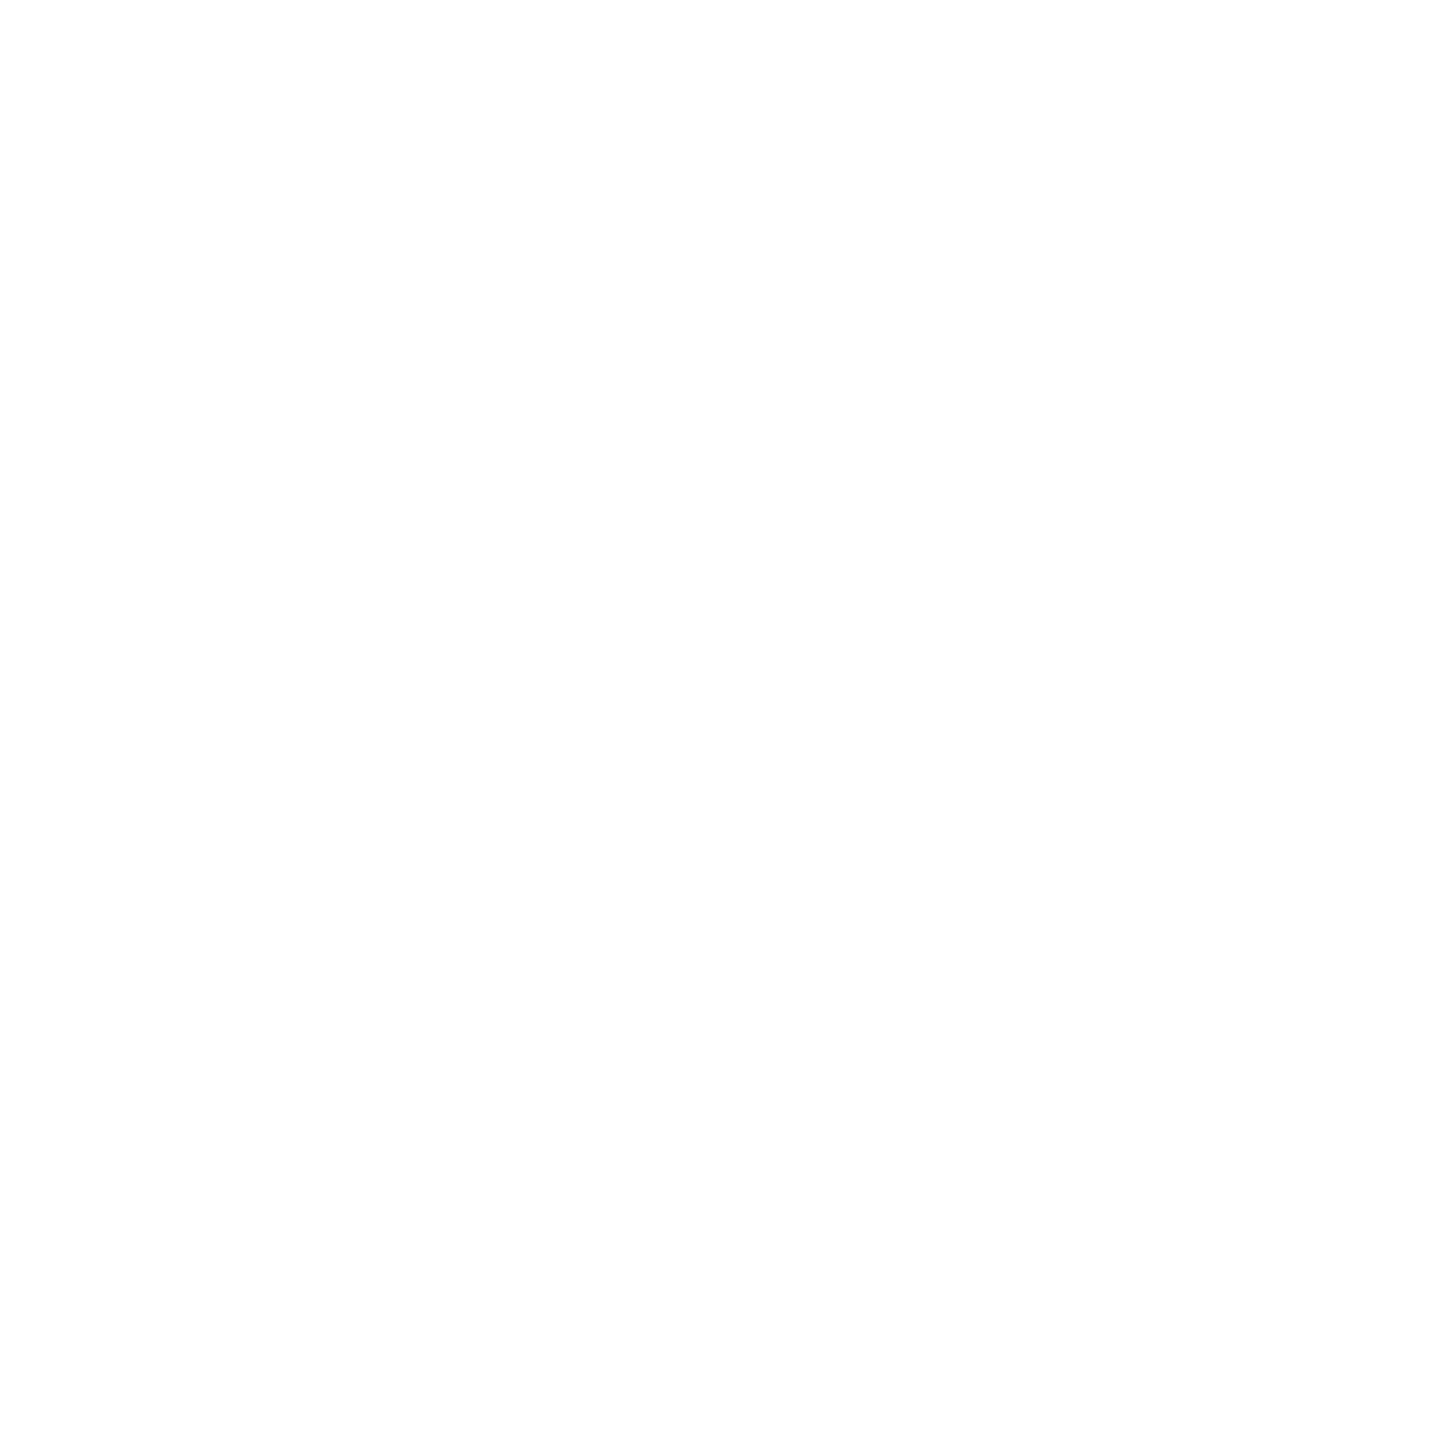

<IPython.core.display.Javascript object>


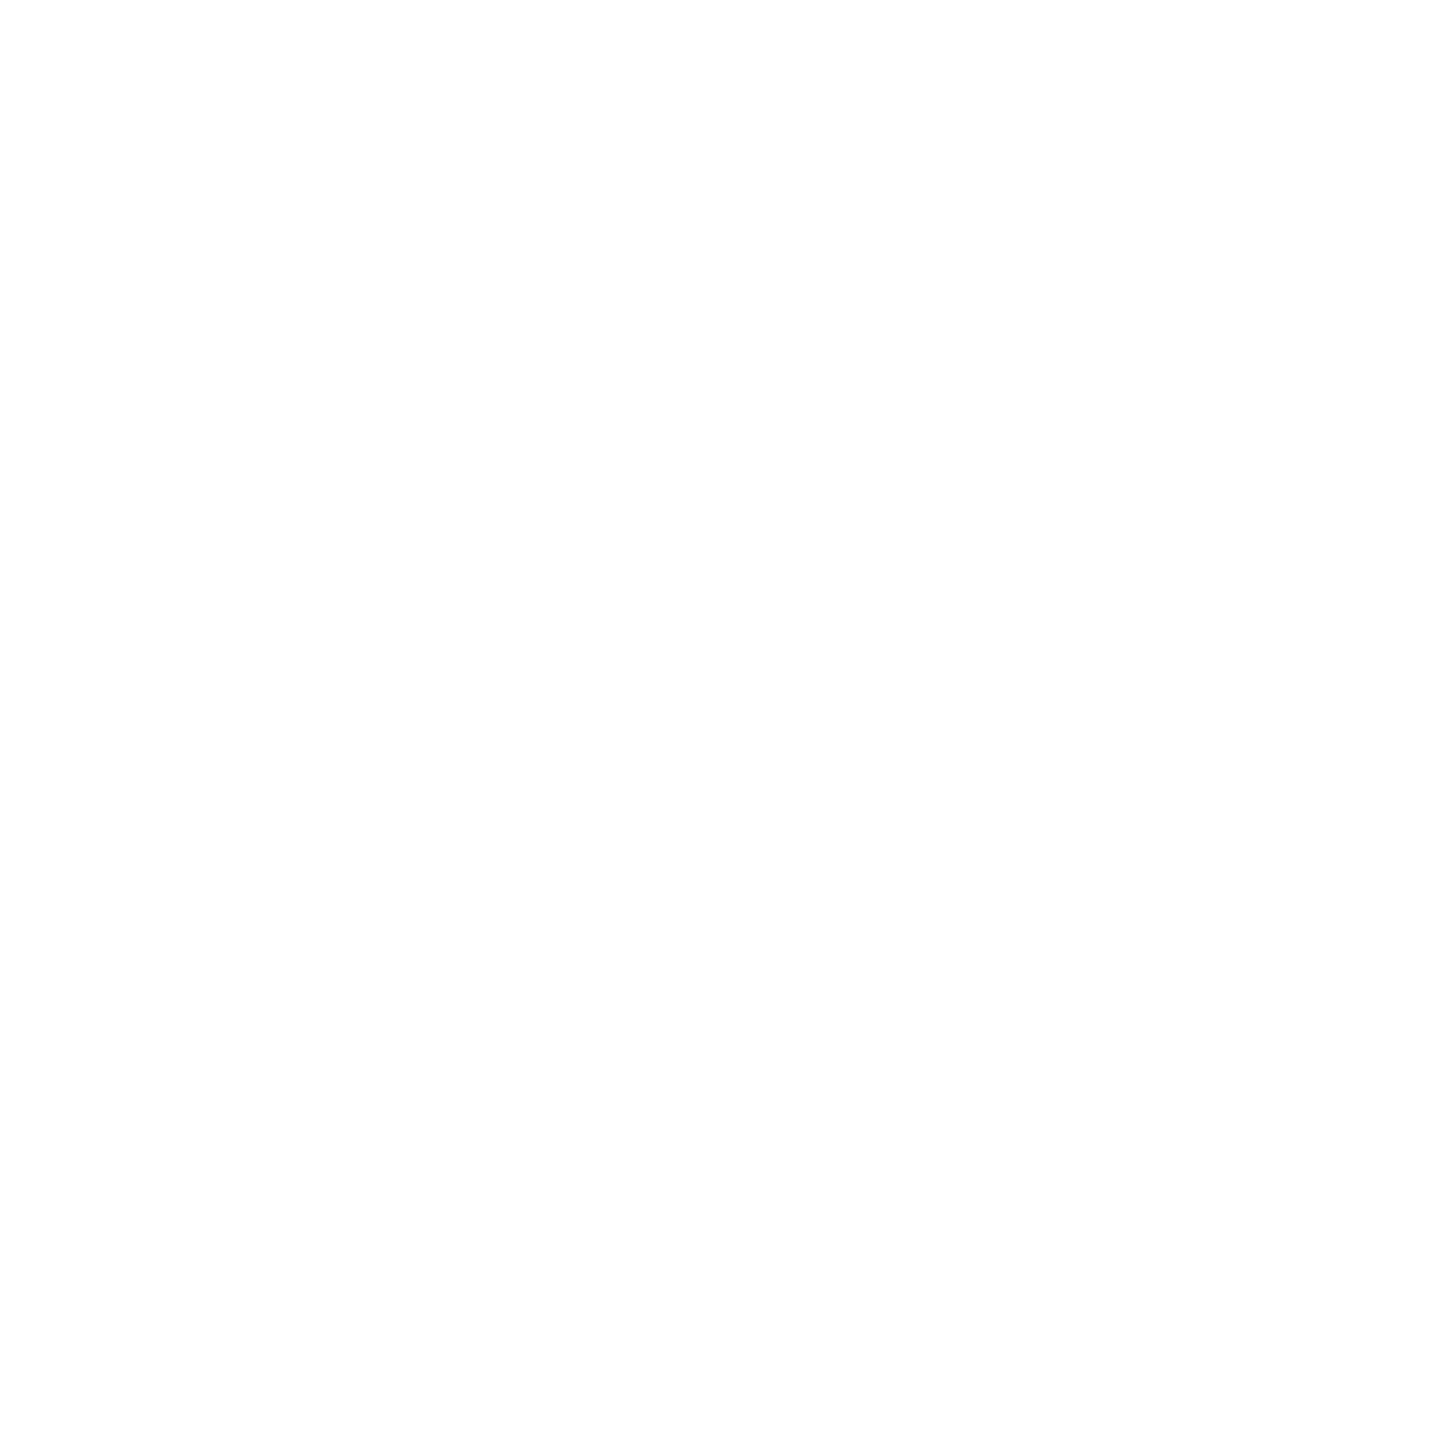

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt





##################################
def uniform_distribution (x, a, b):
    if x>= a and x <= b:
        return 1.0 / (b - a)
    return 0.0
##################################





##################################
##
min_x = -15.0
max_x = 15.0
dx = 0.01

##Three different uniform probability distributions
x = []
u1 = []
u2 = []
u3 = []

tmp = min_x
while tmp <= max_x:
    x.append(tmp)
    u1.append(uniform_distribution (tmp, 0.0, 0.5))
    u2.append(uniform_distribution (tmp, -10.0, 10.0))
    u3.append(uniform_distribution (tmp, -5.0, 1.0))  
    tmp += dx






plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

plt.xlabel('$x$')
plt.ylabel('$P(x)$')




plt.plot(x, u1, color='black', linewidth=6.0, alpha=0.5)
plt.plot(x, u2, color='red', linewidth=6.0, alpha=0.5)
plt.plot(x, u3, color='blue', linewidth=6.0, alpha=0.5)



plt.show()

Random numbers extracted from the uniform distribution can be used to generate random numbers extracted from a great
variety of other probability distributions. The basic function random.random() of the library [random](https://docs.python.org/2/library/random.html) actually generates random variates from a uniform distribution with $a=0$ and $b=1$. 

# Probability density function

A probability density function $P(x)$ is a function defined for real-valued numbers $x$. A random variable extracted from the distribution $P(x)$ will assume with probability $P(x)$ a value in the interval $[x, x+dx]$, with $dx$ infinitely small. For example, in the case of the uniform distribution defined over the interval $[a, b]$, every value $x \in [a,b]$ is equally likely to be extracted. 


## Sample probability density functions

In the analysis of data, we always face the problem of dealing with finite samples. The following code shows how we can estimate the average value, variance and the entire probability distribution function of a given list of real-valued numbers. The main function takes as input a list $(x_1, x_2, \ldots, x_T)$ numbers. **Average value** and the **variance** of the sample are calculated respectively as

$\langle x \rangle =  \frac{1}{T} \, \sum_{t=1}^T \, x_t$

and 

$\sigma^2  = \frac{1}{T} \sum_{t=1}^T \, (x_t - \langle x \rangle)^2$.

These formulas are thus identical to those we have already seen for probability distributions of
integer numbers. The computation of the probability distribution function instead is a little bit cumbersome.
It requires first a *discretization* of the space by defining intervals or bins. Once the space is discretized, we can basically use the same function implemented for integer numbers. We only require to account for the proper normalization of the distribution.

### Python implementation
For illustrative purposes, in the example below the procedure is applied to numbers extracted from a uniform distribution defined in the interval $[0, 1]$.

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib notebook




##This function take as a input a list with
##a set of real numbers, and the total number of bins
##for the histogram. The function returns the histogram (as pair of
## coordinates in the lists x and px), 
##the width of the bins dx, the average value, and the variance 
def histogram_from_real_data (data, bins):

    average_value = 0.0
    variance = 0.0
    
    min_val = min(data) # give arg to replace value error?
    max_val = max(data)
    dx = (max_val - min_val) / bins

    hist = {}
    norm = 0.0
    for r in data:
        b = int( (r - min_val) / dx )
        if b not in hist :
            hist[b] = []
            hist[b].append(0.0)
            hist[b].append(0.0)
        hist[b][0] = hist[b][0] + 1.0
        hist[b][1] = hist[b][1] + r
        norm = norm + 1.0
        average_value += r
        variance += r*r
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
        
    x = []
    px = []

    for b in hist:
        x.append(hist[b][1] / hist[b][0])
        px.append(hist[b][0] / dx / norm)
        #px.append(hist[b][0] / norm)
    
    return x, px, dx, average_value, variance
############################################



##############################

bins = 10
T = 100000

##generate data for experiments
outcomes = []
for t in range (0, T):
    outcomes.append(random.random())
###############


    
x, px, dx, av, var = histogram_from_real_data (outcomes, bins)

##shows that the result is insensitive on the choice of the number of bins
x_tmp, px_tmp, dx_tmp, av, var = histogram_from_real_data (outcomes, 10)




##visualize histogram

plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8


title = '$\\langle x \\rangle = ' + '% .2f' % av + ' \\quad \\sigma^2 = ' + '% .2f' % var + '$'
plt.title(title, fontsize = 20)


plt.xlabel('$x$')
plt.ylabel('$P(x)$')


    

plt.bar(x, px, width=dx, color = 'red', align='center', alpha=0.5)
plt.bar(x_tmp, px_tmp, width=dx_tmp, color = 'black', align='center', alpha=0.35)







plt.show()

TypeError: '<' not supported between instances of 'int' and 'list'

## Sample cumulative probability functions

A much easier way to visualize how data are distributed is to rely on the so-called cumulative distribution function. The function, namely $P( \leq x)$ tells us what is the probability to observe a number in our sample smaller than $x$.
Please note that we do not require any binning to construct a cumulative distribution. We just need to sort in ascending or descending order the numbers appearing in the input list.

### Python implementation
The following code produces a cumulative distribution for numbers extracted from a uniform distribution defined in the interval $[0, 1]$. **The function can be applied to both real-valued or integer numbers**.

<IPython.core.display.Javascript object>


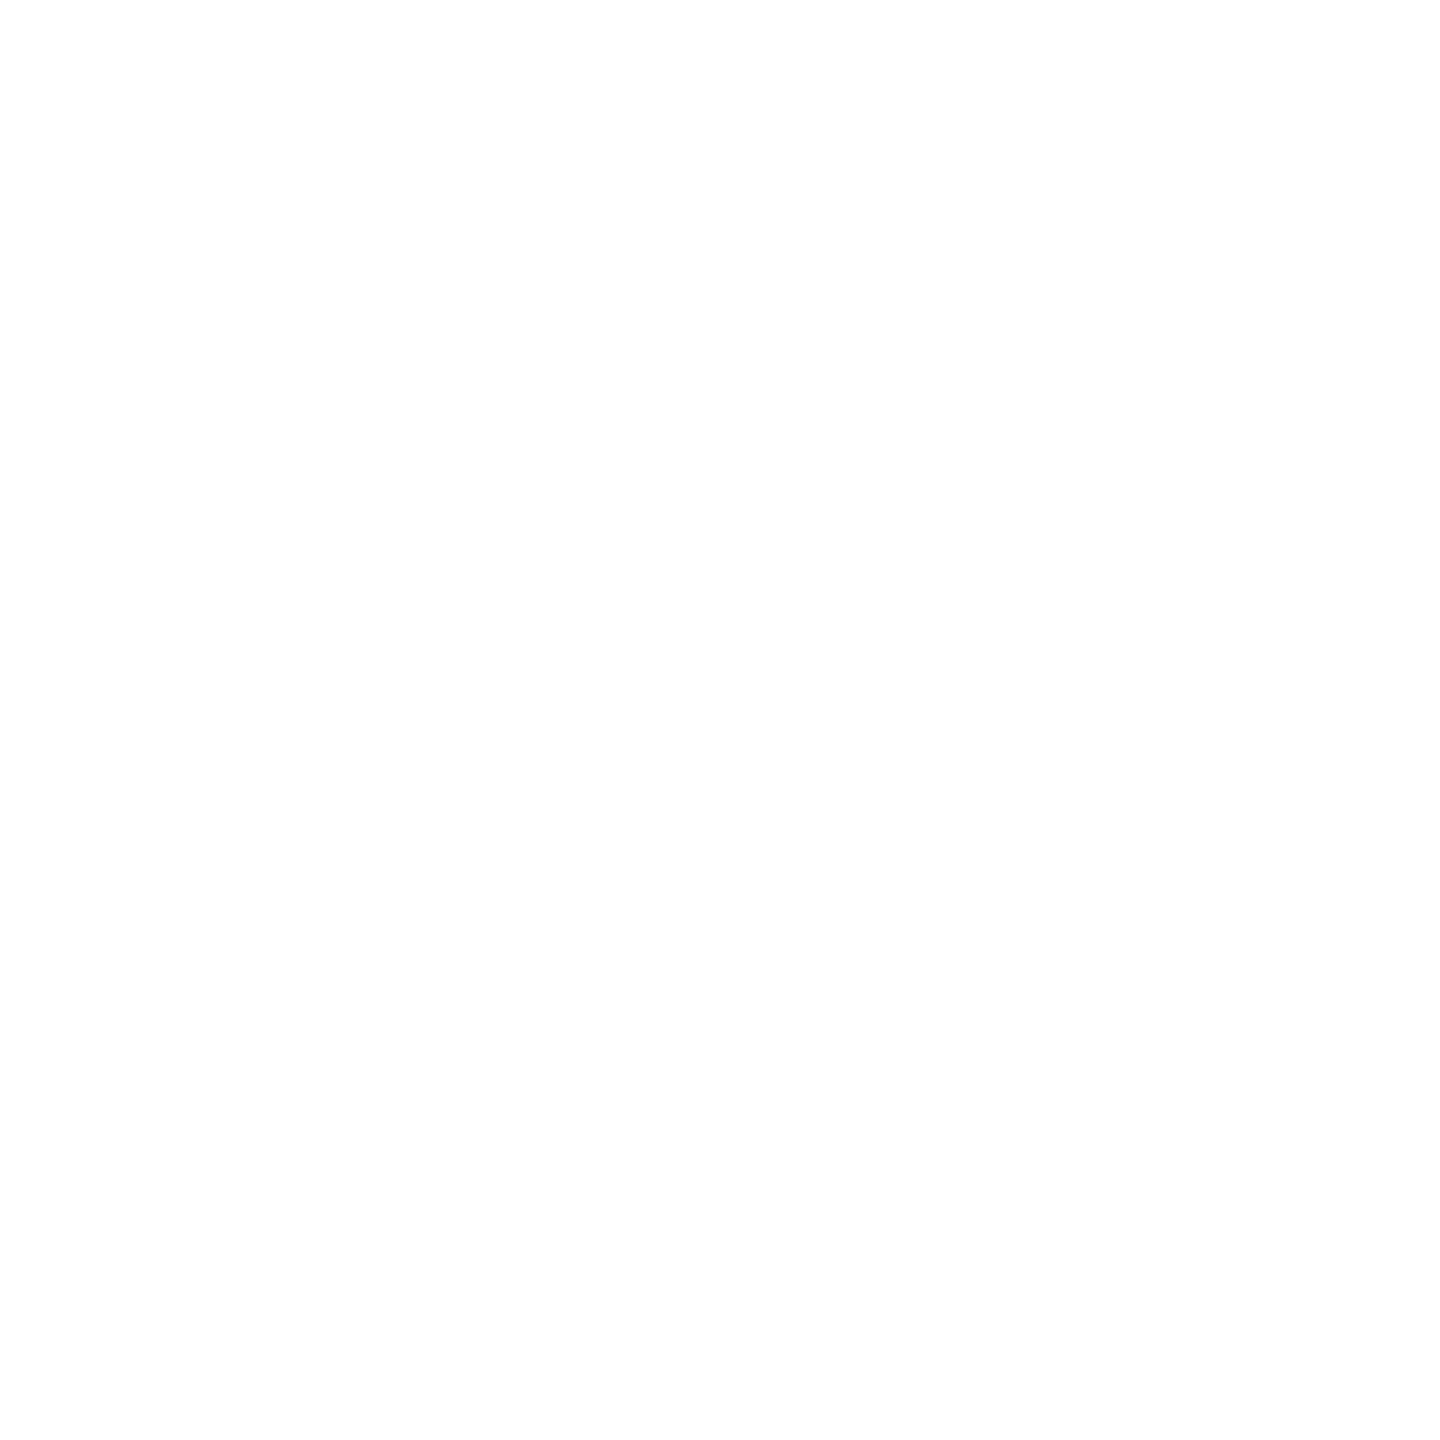

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib notebook



##compute cumulative distribution
####################
def cumulative_from_data (data):
    sorted_data = sorted(data)
    x = []
    cx = []
    norm = 0.0
    for n in sorted_data:
        norm = norm + 1.0
        x.append(n)
        cx.append(norm/float(len(sorted_data)+1.0))
    return x, cx
#####################







##############################
T = 1000

##generate data for experiments
outcomes = []
for t in range (0, T):
    outcomes.append(random.random())
###############


    
x, cx = cumulative_from_data (outcomes)





##visualize histogram

plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8





plt.xlabel('$x$')
plt.ylabel('$P(\\leq x)$')


    

plt.plot(x, cx, color = 'red', linewidth=4.0, alpha=0.5)







plt.show()

### Additional example: Exponential distribution
As a additional example, we analyze numbers randomly extracted from the exponential probability distribution
$
P(x) = e^{-x}
$. To better show how the distributions decay at large $x$ values, we consider the survival function $P(>x) = 1 - P(\leq x)$ instead of the cumulative distribution $P(\leq x)$.

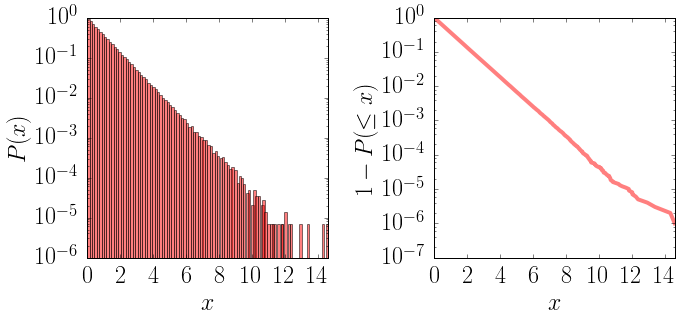

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook




#compute cumulative distribution
####################
def survival_function_from_data (data):
    sorted_data = sorted(data)
    x = []
    cx = []
    norm = 0.0
    for n in sorted_data:
        norm = norm + 1.0
        x.append(n)
        cx.append(1.0 - norm/float(len(sorted_data)+1.0))
    return x, cx
#####################



##This function take as a input a list with
##a set of real numbers, and the total number of bins
##for the histogram. The function returns the histogram (as pair of
## coordinates in the lists x and px), 
##the width of the bins dx, the average value, and the variance 
def histogram_from_real_data (data, bins):

    average_value = 0.0
    variance = 0.0
    
    min_val = min(data)
    max_val = max(data)
    dx = (max_val - min_val) / bins

    hist = {}
    norm = 0.0
    for r in data:
        b = int( (r - min_val) / dx )
        if b not in hist :
            hist[b] = []
            hist[b].append(0.0)
            hist[b].append(0.0)
        hist[b][0] = hist[b][0] + 1.0
        hist[b][1] = hist[b][1] + r
        norm = norm + 1.0
        average_value += r
        variance += r*r
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
        
    x = []
    px = []

    for b in hist:
        x.append(hist[b][1] / hist[b][0])
        px.append(hist[b][0] / dx / norm)
    
    return x, px, dx, average_value, variance
############################################






bins = 100
T = 1000000

##Data generation
outcomes = np.random.exponential(size=T)





##visualize histogram

plt.figure(figsize=(10,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8


ax1 = plt.subplot(1,2,1)



x, px, dx, av, var = histogram_from_real_data (outcomes, bins)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$P(x)$')
ax1.bar(x, px, width=dx, color = 'red', align='center', alpha=0.5)





ax2 = plt.subplot(1,2,2)


x, cx = survival_function_from_data (outcomes)

ax2.set_xlabel('$x$')
ax2.set_ylabel('$1 - P(\\leq x)$')
ax2.plot(x, cx, color = 'red', linewidth=4.0, alpha=0.5)




ax1.set_xlim(0, max(outcomes))
ax2.set_xlim(0, max(outcomes))



ax1.set_yscale('log')
ax2.set_yscale('log')




plt.tight_layout()
plt.show()









### Additional example: Normal distribution
To generate random numbers that obey a normal distribution, we will rely on the (Central Limit Theorem)[https://en.wikipedia.org/wiki/Central_limit_theorem]. We will just extract $N$ numbers from the uniform distribution, and take their sum. We will generate $T$ total numbers in this way.

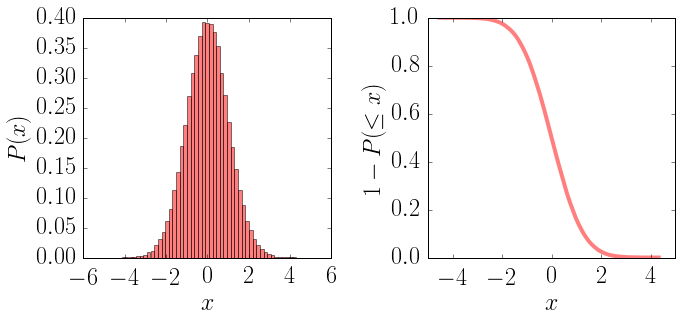

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook




#compute cumulative distribution
####################
def survival_function_from_data (data):
    sorted_data = sorted(data)
    x = []
    cx = []
    norm = 0.0
    for n in sorted_data:
        norm = norm + 1.0
        x.append(n)
        cx.append(1.0 - norm/float(len(sorted_data)+1.0))
    return x, cx
#####################



##This function take as a input a list with
##a set of real numbers, and the total number of bins
##for the histogram. The function returns the histogram (as pair of
## coordinates in the lists x and px), 
##the width of the bins dx, the average value, and the variance 
def histogram_from_real_data (data, bins):

    average_value = 0.0
    variance = 0.0
    
    min_val = min(data)
    max_val = max(data)
    dx = (max_val - min_val) / bins

    hist = {}
    norm = 0.0
    for r in data:
        b = int( (r - min_val) / dx )
        if b not in hist :
            hist[b] = []
            hist[b].append(0.0)
            hist[b].append(0.0)
        hist[b][0] = hist[b][0] + 1.0
        hist[b][1] = hist[b][1] + r
        norm = norm + 1.0
        average_value += r
        variance += r*r
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
        
    x = []
    px = []

    for b in hist:
        x.append(hist[b][1] / hist[b][0])
        px.append(hist[b][0] / dx / norm)
    
    return x, px, dx, average_value, variance
############################################






#############
def uniform_distribution (N):
    data = []
    for i in range (0, N):
        data.append(random.random())
    return data
#############



#############
def normal_distribution_central_limit (N, R):
    data = []
    for i in range (0, N):
        tmp_data = uniform_distribution(R)
        z = np.sqrt(R)*( np.mean(tmp_data) - 0.5 ) / np.sqrt(np.var(tmp_data))
        data.append(z)
    return data
#############




bins = 50

T = 100000
N = 100



outcomes = normal_distribution_central_limit (T, N)







#visualize histogram

plt.figure(figsize=(10,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8


ax1 = plt.subplot(1,2,1)



x, px, dx, av, var = histogram_from_real_data (outcomes, bins)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$P(x)$')
ax1.bar(x, px, width=dx, color = 'red', align='center', alpha=0.5)





ax2 = plt.subplot(1,2,2)


x, cx = survival_function_from_data (outcomes)

ax2.set_xlabel('$x$')
ax2.set_ylabel('$1 - P(\\leq x)$')
ax2.plot(x, cx, color = 'red', linewidth=4.0, alpha=0.5)











plt.tight_layout()
plt.show()

